In [1208]:
using Plots;
using SpecialFunctions;
using Latexify;

V = 15
K = 5
H = 6
M = 5
P = 4
#V = 0
#M = 4
#P = 2

    
function comb(m, n)
    return factorial(n) / (factorial(m) * factorial(n-m))
end

rnd(x) = round(x, digits=3)

rnd (generic function with 1 method)

### Задача 1

In [1209]:
summ = H + K 
n = comb(M, summ)

462.0

In [1210]:
print("В урне содержится $K черных и $H белых шаров. Случайным образом вынимают $M шаров. Найти вероятность того, что среди них имеется:\nа) Р белых шаров; б) меньше, чем Р, белых шаров; в) хотя бы один белый шар.")

В урне содержится 5 черных и 6 белых шаров. Случайным образом вынимают 5 шаров. Найти вероятность того, что среди них имеется:
а) Р белых шаров; б) меньше, чем Р, белых шаров; в) хотя бы один белый шар.

#### a)

In [1211]:
print("А1 — среди вынутых шаров $P белых. Значит, среди вынутых шаров $P белых и $(M-P) черных. Используя правило умножения, получаем")

m1 = comb(P,H) #Сочетание из P по H
m2 = comb(M - P, K) 
m = m1 * m2
"m=C_$H^$P*C_$K^$(M-P)=$m" |> latexify |> display
"P(A_1)=$m/$n"             |> latexify |> display
A1 = m / n
print("A1 = $A1")


А1 — среди вынутых шаров 4 белых. Значит, среди вынутых шаров 4 белых и 1 черных. Используя правило умножения, получаем

L"$m = C_{6}^{4} \cdot C_{5}^{1} = 75.0$"

L"$P\left( A_{1} \right) = \frac{75.0}{462.0}$"

A1 = 0.16233766233766234

#### б)

In [1212]:
# В случае с условием у нас возникает множество выборок. 
# Так как вероятности несовместные, их следует просумировать
[comb(i, H) * comb(M - i,K) / n for i in range(P-1,0,step=-1)] |> sum

0.8246753246753247

#### в)

In [1213]:
# Идентично прошлому примеру, также присутствует условие, решение аналогично
[comb(i, H) * comb(M - i,K) / n for i in 1:M] |> sum

0.9978354978354979

### Задача 2

In [1214]:
k = abs(14.9 - V) / 100
p1 = 1 - k
p2 = 0.9 - k
p3 = 0.85 - k

function ¬(m) 
    return 1 - m
end

¬ (generic function with 1 method)

In [1215]:
print("Устройство состоит из трех независимых элементов, работающих в течение времени Т безотказно соответственно с вероятностями $(rnd(p1)) , $(rnd(p2)) и $(rnd(p3)). Найти вероятность того, что за время Т выйдет из строя: а) только один элемент; б) хотя бы один элемент.")

Устройство состоит из трех независимых элементов, работающих в течение времени Т безотказно соответственно с вероятностями 0.999 , 0.899 и 0.849. Найти вероятность того, что за время Т выйдет из строя: а) только один элемент; б) хотя бы один элемент.

#### a)

In [1216]:
# В данной задаче даны только вероятности
# Умножение соотвествует "и", а сложение "или"
A = (¬p1 * p2 * p3) + (p1 * ¬p2 * p3) + (p1 * p2 * ¬p3)

0.222039753

#### б)

In [1217]:
# Для того, чтобы узнать, выйдет ли из строя хотя-бы один элемент
# следует инвертировать произведение вероятностей исправности всех элементов
A = p1 * p2 * p3 
¬A

0.23751225099999995

### Задача 3

In [1218]:
k = abs(14-V) 
p1 = 0.95 - k / 100 #шанс попадания с оптикой 
p2 = 0.6 - k / 100 
R = 5 + k #Общее количество винтовок
L = V > 14 ? 4 : 3 #Винтовки с оптическим прицелом

4

In [1219]:
print("В пирамиде стоят $R винтовок, из них $L, с оптическим прицелом. Стрелок, стреляя из винтовки с оптическим прицелом, может поразить мишень с вероятностью $(rnd(p1)), а, стреляя из винтовки без оптического прицела, — с вероятностью $(rnd(p2)). Найти вероятность того, что стрелок поразит мишень, стреляя из случайно взятой винтовки.")

В пирамиде стоят 6 винтовок, из них 4, с оптическим прицелом. Стрелок, стреляя из винтовки с оптическим прицелом, может поразить мишень с вероятностью 0.94, а, стреляя из винтовки без оптического прицела, — с вероятностью 0.59. Найти вероятность того, что стрелок поразит мишень, стреляя из случайно взятой винтовки.

In [1220]:
B1 = L / R # событие получение оптической винтовки
B2 = (R - L) / R # событие получения обычной винтой

# Следует использовать формулу полной вероятности,
# так как шанс попадания из винтовки зависит от вероятности, какую винтовку возьмет стрелок
A = B1 * p1 + B2 * p2 

0.8233333333333333

### Задача 4


In [1221]:
k = abs(14-V)
p1 = 0.99 - k / 100  #шанс успешной работы первой детали
p2 = 0.9 - k / 100   #шанс успешной работы второй детали
p3 = 0.85 - k / 100  #шанс успешной работы третьей детали
M1 = 5 + k
M2 = 20 - k
M3 = 25 - k
summ = M1 + M2 + M3 
B1 = M1 / summ #вероятность достать первую деталь
B2 = M2 / summ #вероятность достать вторую деталь
B3 = M3 / summ #вероятность достать третию деталь

0.4897959183673469

In [1222]:
print("В монтажном цехе к устройству присоединяется электродвигатель. Электродвигатели поставляются тремя заводами-изготовителями. На складе имеются электродвигатели этих заводов соответственно в количестве $M1, $M2, $M3 штук, которые могут безотказно работать до конца гарантийного срока с вероятностями соответственно $(rnd(p1)) , $(rnd(p2)) и $(rnd(p3)). Рабочий берет случайно один электродвигатель и монтирует его к устройству. Найти вероятности того, что смонтированный и работающий безотказно до конца гарантийного срока электродвигатель поставлен соответственно первым, вторым или третьим заводом-изготовителем.")

В монтажном цехе к устройству присоединяется электродвигатель. Электродвигатели поставляются тремя заводами-изготовителями. На складе имеются электродвигатели этих заводов соответственно в количестве 6, 19, 24 штук, которые могут безотказно работать до конца гарантийного срока с вероятностями соответственно 0.98 , 0.89 и 0.84. Рабочий берет случайно один электродвигатель и монтирует его к устройству. Найти вероятности того, что смонтированный и работающий безотказно до конца гарантийного срока электродвигатель поставлен соответственно первым, вторым или третьим заводом-изготовителем.

In [1223]:
#воспользуемся формулой полной вероятности
A = B1 * p1 + B2 * p2 + B3 * p3

function bias(pH, pAH, pA)
    return pH * pAH / pA
end

# Для нахождения вероятностей отказоустойчивости отдельного двигателя относительно общей вероятности
# следует воспользоваться Формулой байеса
B1A = bias(B1, p1, A)
B2A = bias(B2, p2, A)
B3A = bias(B3, p3, A)

(B1A, B2A, B3A)

(0.13690337601862632, 0.3937136204889406, 0.46938300349243306)

### Задача 5

In [1224]:
n = 
    if          V <= 10 11
    elseif 10 < V <= 20 10 
    else                 9 end

p = 0.3 + V / 100

0.44999999999999996

In [1225]:
print("В каждом из п независимых испытаний событие А происходит с постоянной вероятностью $p. Вычислить все вероятности pk, k = 0, 1, 2, ... $n , где k — частота события А.")

В каждом из п независимых испытаний событие А происходит с постоянной вероятностью 0.44999999999999996. Вычислить все вероятности pk, k = 0, 1, 2, ... 10 , где k — частота события А.

0:10

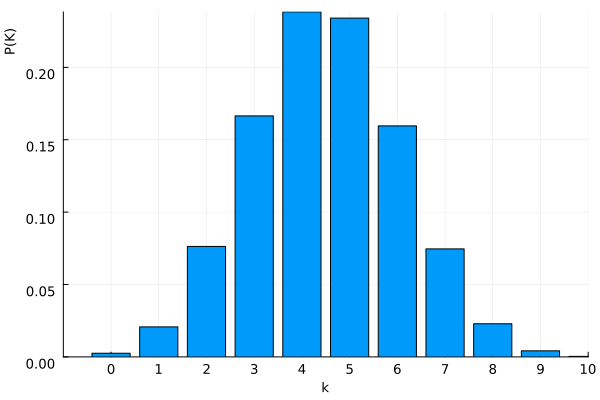

In [1226]:
bernulli(k, n, p) = comb(k, n) * p^k * (¬p)^(n-k)

k = 0:n
print(k)
# При множестве независимых испытыний с одинаковой 
# вероятностью наступления, следует воспользоваться
# формулой бернулли
y = map(ki -> bernulli(ki, n, p), k)

bar(k,y, legend = false, xaxis=("k", (-1,n),k, font(9)), yaxis = ("P(K)", font(9, :top)))

In [1227]:
_, probK = zip(y,1:n) |> maximum
println("Наивероятнейшая частота: " * string(probK))

Наивероятнейшая частота: 5


### Задача 6

In [1228]:
n=500+10V
p=0.4+V/100
G=220+10V
L=G-30
M=G+20+V
F=G-40+V
R=G+15

385

In [1229]:
print("В каждом из $n независимых испытаний событие А происходит с постоянной вероятностью $p. Найти вероятность того, что событие А происходит: а) точно $G раз; б) точно $L раз; в) меньше чем $M и больше чем $F раз; г) меньше чем $R раз.")

В каждом из 650 независимых испытаний событие А происходит с постоянной вероятностью 0.55. Найти вероятность того, что событие А происходит: а) точно 370 раз; б) точно 340 раз; в) меньше чем 405 и больше чем 345 раз; г) меньше чем 385 раз.

In [1230]:
function localLaplace(m,n,p)
    𝜑(x) = 1/√(2π) * ℯ^-(x^2/2)
    div = √(¬p * n * p)
    x = (m-n*p)/div
    return 1/div*𝜑(x)
end

function integralLaplace(m1,m2,n,p)
    𝜑(x) = erf(x/√2)/2
    div = √(¬p * n * p)
    x1 = (m1-n*p)/div
    x2 = (m2-n*p)/div
    return 𝜑(x1)-𝜑(x2)
end

# Аналогично предыдущей задаче, присутствует множество несовместных
# событий с постоянной вероятностью, 
# для оптимизации вычислений при высокой частоте следует воспользоваться
# локальной и интегральной теоремой лапласа
a = localLaplace(G,n,p)
b = localLaplace(L,n,p)
c = integralLaplace(M, F, n, p)
d = integralLaplace(R, 0, n, p)

println("а = $a")
println("б = $b")
println("в = $c")
println("г = $d")

а = 0.019353580230519137
б = 0.012142078246762033
в = 0.8377256012161478
г = 0.984926189219165
